In [ ]:
import matplotlib as plt

inside  = 0
left    = 1
right   = 2
bottom  = 4
top     = 8

def compute_out_code(x,y,x_min,y_min,x_max,y_max):
    code = inside
    if x < x_min:
        code |= left
    elif x > x_max:
        code |= right
    if y < y_min:
        code |= bottom
    elif y > y_max:
        code |= top
    return code

def clipiing(x1,y1,x2,y2,x_min,y_min,x_max,y_max):
    outcode1 = compute_out_code(x1,y1,x_min,y_min,x_max,y_max)
    outcode2 = compute_out_code(x2,y2,x_min,y_min,x_max,y_max)
    accpet = False

    while True:
        if not (outcode1 |  outcode2):
            accpet = True
            break
        elif outcode1 & outcode2:
            break
        else:
            outcode_out = outcode1 if outcode1 else outcode2

            if outcode_out & top:
                x = x1 + (x2 - x1) * (y_max - y1) / (y2 - y1)
                y = y_max
            elif outcode_out & bottom:
                x =  x1 + (x2 - x1) * (y_min - y1) / (y2 - y1)
                y = y_min
            elif outcode_out & right:
                y = y1 + (y2 - y1) * (x_max - x1) / (x2 - x1)
                x = x_max
            elif outcode_out & left:
                y = y1 + (y2 - y1) * (x_min - x1) / (x2 - x1)
                x = x_min
            
            if outcode_out == outcode1:
                x1,y1 = x,y
                outcode1 = compute_out_code(x1,y1,x_min,y_min,x_max,y_max)
            else:
                x2,y2 = x,y
                outcode2 = compute_out_code(x2,y2,x_min,y_min,x_max,y_max)
    
    if accpet:
        return (x1,y1,x2,y2)
    else:
        return None
    


if __name__ == "__main__":
    x_min,y_min = 50,50
    x_max,y_,ax = 100,100

    lines = [
        (30, 30, 70, 70),    # crosses
        (60, 20, 80, 120),   # crosses top and bottom
        (20, 80, 120, 80),   # horizontal
        (70, 70, 90, 90),    # fully inside
        (110, 110, 130, 130) # fully outside
    ]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))





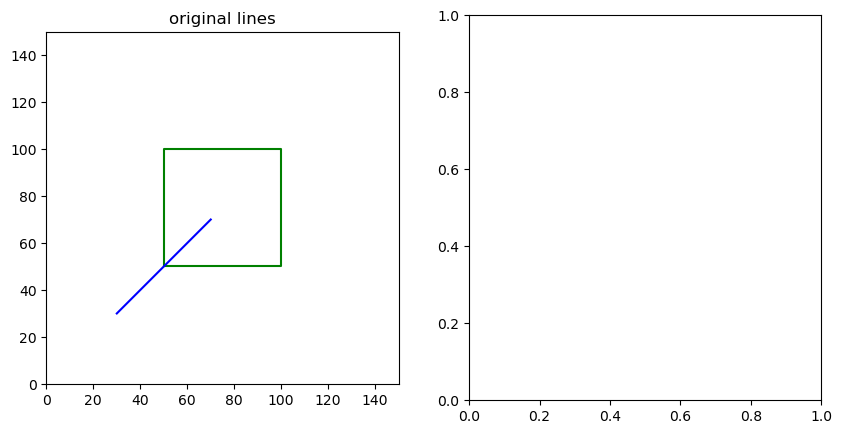

In [9]:
import matplotlib.pyplot as plt

inside = 0
left = 1
right = 2
bottom = 4
top = 8


def compute_code(x,y, x_min, y_min, x_max,y_max):
    code = inside

    if x<x_min:
        code |= left
    elif x> x_max:
        code |= right
    if y<y_min:
        code |= bottom
    elif y>y_max:
        code |= top
    return code

def clip(x1,y1,x2,y2,x_min,y_min,x_max,y_max):
    outcode1 = compute_out_code(x1,y1, x_min,y_min,x_max,y_max)
    outcode2 = compute_out_code(x2,y2, x_min,y_min,x_max,y_max)

    accept = False
    while True:
        if not (outcode1 | outcode2):
            accept = True
            break
        elif outcode1 & outcode2:
            break
        else:
            outcode = outcode1 if outcode1 else outcode2

            if outcode & top:
                x = x1 + (x2-x1) * (y_max - y1) /(y2-y1)
                y = y_max
            elif outcode & bottom:
                x = x1 + (x2 - x1) * (y_min - y1) / (y2 - y1)
                y = y_min
            elif outcode & right:
                y = y1 + (y2 - y1) * (x_max - x1) / (x2 - x1)
                x = x_max
            elif outcode & left:
                y = y1 + (y2 - y1) * (x_min - x1) / (x2 - x1)
                x = x_min
            
            if outcode == outcode1:
                x1,y1 = x,y
                outcode1 = compute_out_code(x1,y1, x_min,y_min,x_max,y_max)
            else:
                x2,y2 = x,y
                outcode2 = compute_out_code(x2,y2, x_min,y_min,x_max,y_max)

    if accept == True:
        return (x1,y1,x2,y2)
    else:
        return None
    

if __name__ == "__main__":
    x_min, y_min = 50, 50
    x_max, y_max = 100, 100


lines = [
    (30,30, 70,70)
]
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))

ax1.set_title("original lines")
ax1.plot([x_min, x_max, x_max, x_min, x_min],[y_min, y_min, y_max, y_max, y_min], 'g')
for line in lines:
    ax1.plot([line[0], line[2]], [line[1], line[3]], 'b')

ax1.set_xlim(0,150)
ax1.set_ylim(0,150)
ax1.set_aspect('equal')






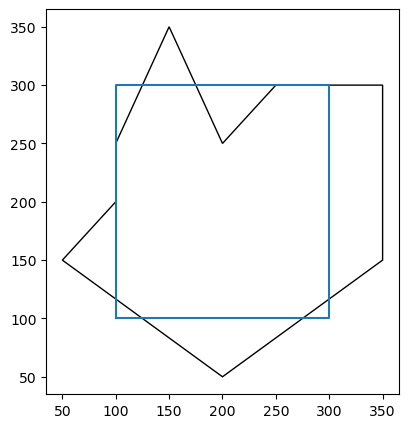

In [21]:
import matplotlib.pyplot as plt

def inside(p, edge_start, edge_end):
    return (edge_end[0] -edge_start[0] * (p[1]) - edge_start[1]) - \
            (edge_end[1] - edge_start[1]) * (p[0] - edge_start[0]) >= 0


def compute_intersection(p1,p2,cp1,cp2):
    dc = [cp1[0] - cp2[0] , cp1[1] - cp2[1]]
    dp = [p1[0]-p2[0],p1[1]-p2[1]]
    n1 = cp1[0] * cp2[1] - cp1[1] * cp2[0]
    n2 = p1[0] * p2[1] - p1[1] * p2[0]
    n3 = dc[0] * dp[1] - dc[1] * dp[0]

    if n3 == 0:
        return None
    x = (n1 * dp[0] - n2 * dc[0]) /n3
    y = (n1 * dp[1] - n2 * dc[1]) /n3
    return (x,y)

def sutherlan(subject_polygon, clip_polygon):
    output_list = subject_polygon
    cp1 = clip_polygon[-1]

    for cp2 in clip_polygon:
        input_list = output_list
        output_list = []
        if not input_list:
            break
        s = input_list[-1]

        for e in input_list:
            if inside(e,cp1,cp2):
                if not inside( s, cp1,cp2):
                    output_list.append(compute_intersection(s,e,cp1,cp2))
                output_list.append(e)
            elif inside(s,cp1,cp2):
                output_list.append(compute_intersection(s,e,cp1,cp2))
            s = e
        cp1 = cp2
    return output_list

# Example subject polygon and clipping window
subject_polygon = [(50, 150), (200, 50), (350, 150), (350, 300), (250, 300), (200, 250), (150, 350), (100, 250), (100, 200)]
clip_window = [(100, 100), (300, 100), (300, 300), (100, 300)]

# Perform clipping
clipped_polygon = sutherlan(subject_polygon, clip_window)

# Plot original polygon
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.fill(*zip(*subject_polygon), fill=False)
plt.plot(*zip(*(clip_window + [clip_window[0]])))


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


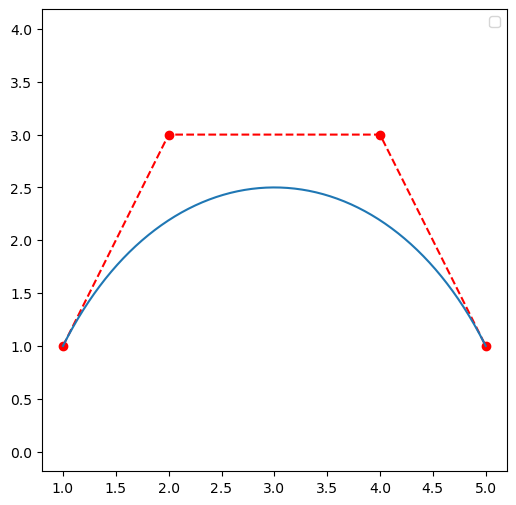

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def de_caste(control_points, t):
    points = np.array(control_points, dtype=float)
    n = len(points)
    for r in range(1,n):
        points[:n-r] = (1 - t) * points[:n-r] +  t * points[1:n-r+1]
    return points[0]

def bezier_curve(control_points, num_samples = 100):
    return np.array([de_caste(control_points,t) for t in np.linspace(0,1,num_samples)])


control_points = [(1, 1), (2, 3), (4, 3), (5, 1)]
curve = bezier_curve(control_points, num_samples=200)

plt.figure(figsize=(6,6))
control_points_np = np.array(control_points)

plt.plot(control_points_np[:,0],control_points_np[:,1], 'ro--')

plt.plot(curve[:,0],curve[:,1])


plt.legend()
plt.axis('equal')
plt.show()



